# Suicide Rates Overview 1985 to 2016

## 1- Veriyi tanıma:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data=pd.read_csv('C:/VeriBilimi/SuicideRates/Data/master.csv')
data=original_data.copy()

In [3]:
data.shape #rows & columns count

(27820, 12)

In [4]:
data.sample(5) #show data random 5 rows

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
10920,Guatemala,2004,male,25-34 years,48,833813,5.76,Guatemala2004,NaN,"23,965,275,996",2215,Generation X
3261,Belarus,1996,male,55-74 years,859,809000,106.18,Belarus1996,NaN,"14,756,846,154",1524,Silent
20470,Republic of Korea,2005,male,75+ years,780,442349,176.33,Republic of Korea2005,NaN,"898,137,194,716",19460,Silent
6622,Croatia,2016,male,35-54 years,146,571003,25.57,Croatia2016,NaN,"51,338,524,831",12905,Generation X
8132,El Salvador,1996,female,25-34 years,22,434209,5.07,El Salvador1996,NaN,"9,586,327,800",1959,Generation X


In [5]:
#data.head() #show data first 5 rows
#data.tail() #show data last 5 rows
#data.describe() #Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given.
data.info() #The info function shows the data types and numerical values of the features in our data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Kolon isimlerini notasyona uygun hale getirme:

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
data=data.rename(columns={'sex':'gender','suicides/100k pop':'suicides_100k_pop','country-year':'country_year','HDI for year':'hdi_for_year',' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})

In [8]:
data.columns

Index(['country', 'year', 'gender', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country_year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

### Eksik verileri tespit etme: 

In [9]:
# Is there any missing value?
data.isnull().any() 

country              False
year                 False
gender               False
age                  False
suicides_no          False
population           False
suicides_100k_pop    False
country_year         False
hdi_for_year          True
gdp_for_year         False
gdp_per_capita       False
generation           False
dtype: bool

In [10]:
# How many missing data
data.isnull().sum()

country                  0
year                     0
gender                   0
age                      0
suicides_no              0
population               0
suicides_100k_pop        0
country_year             0
hdi_for_year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

### Kullanılmayacak verileri çıkarma:

In [11]:
# remove hdi_for_year data and country_year
data=data.drop(['hdi_for_year','country_year'],axis=1)

## 2- Veri görselleştirme

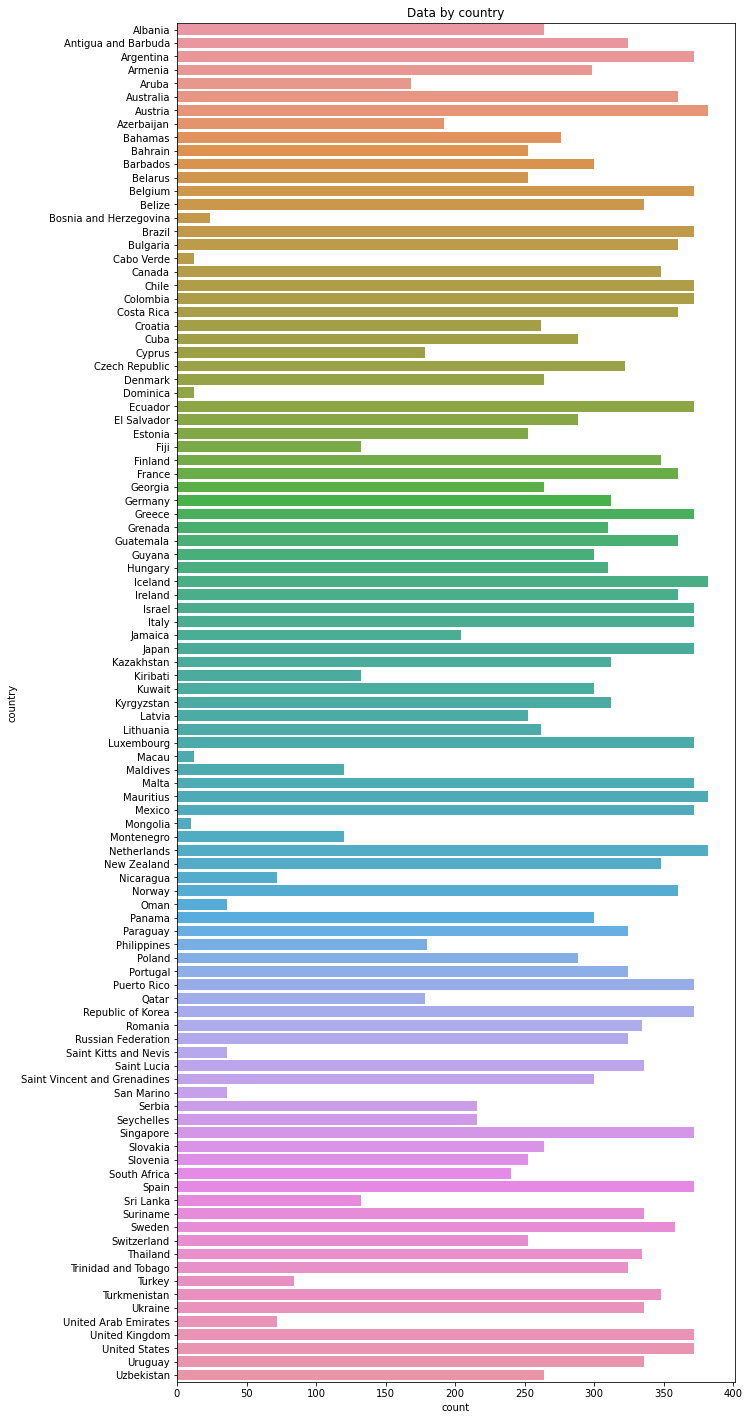

In [12]:
# Data by country

plt.figure(figsize=(10,25))
country= sns.countplot(y='country', data=data)
    
plt.title('Data by country')
plt.show()

### Correlations between values

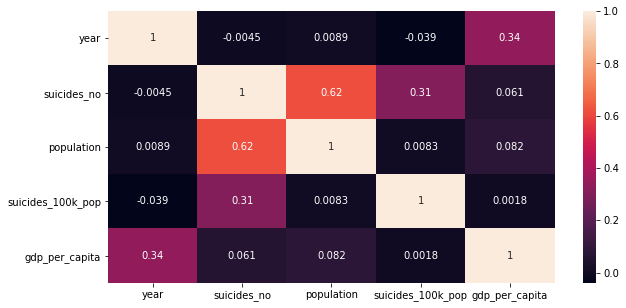

In [13]:
# Heatmap
plt.figure(figsize=(10,5))
cor = sns.heatmap(data.corr(), annot = True)

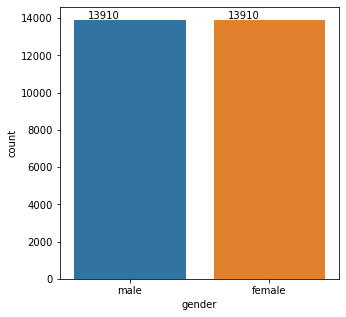

In [14]:
# gender
plt.figure(figsize=(5,5))

gender = sns.countplot(x='gender',data = data)
for p in gender.patches:
    gender.annotate('{0}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

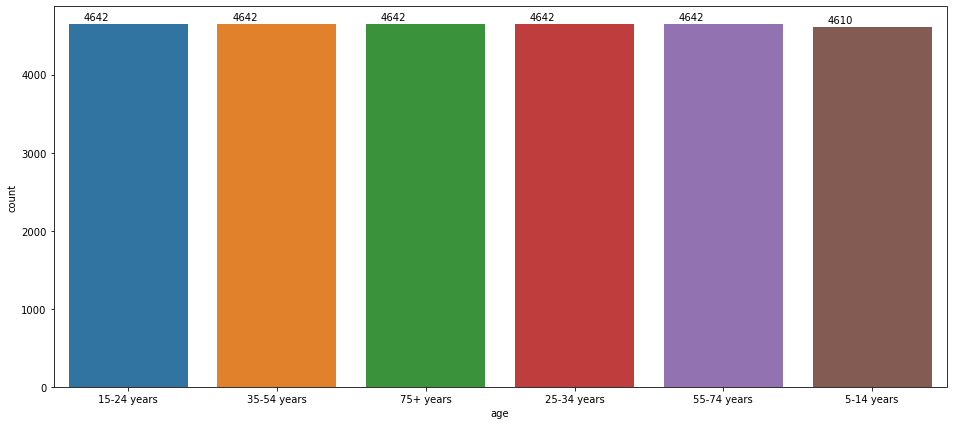

In [15]:
# age
plt.figure(figsize=(16,7))
gender = sns.countplot(x='age',data = data)

for p in gender.patches:
    gender.annotate('{0}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# yaşa göre sıralamma yapılmalı

C:\Users\fozyer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


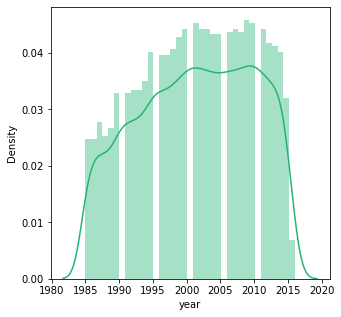

In [16]:
plt.figure(figsize=(5,5))
sns.distplot(data.year.dropna(), color = '#22B573')
plt.show()

C:\Users\fozyer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


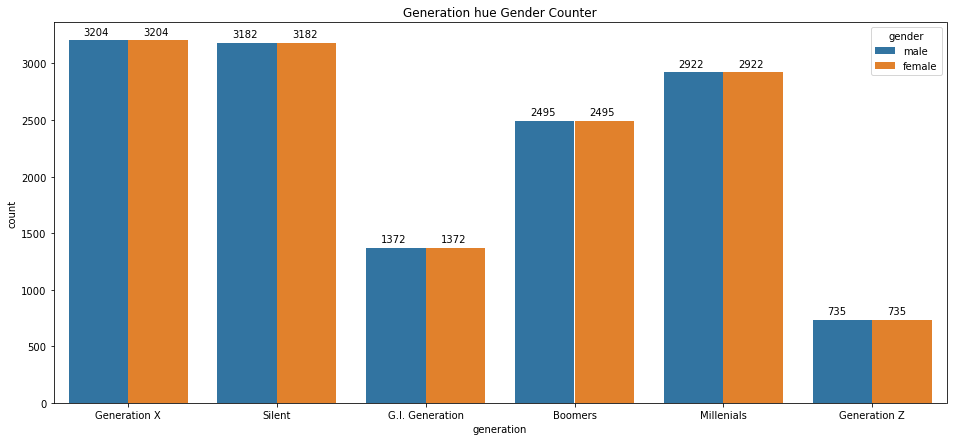

In [17]:
plt.figure(figsize=(16,7))
generation=sns.countplot(data.generation,hue=data.gender)

for p in generation.patches:
    generation.annotate('{0}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
plt.title('Generation hue Gender Counter')
plt.show()

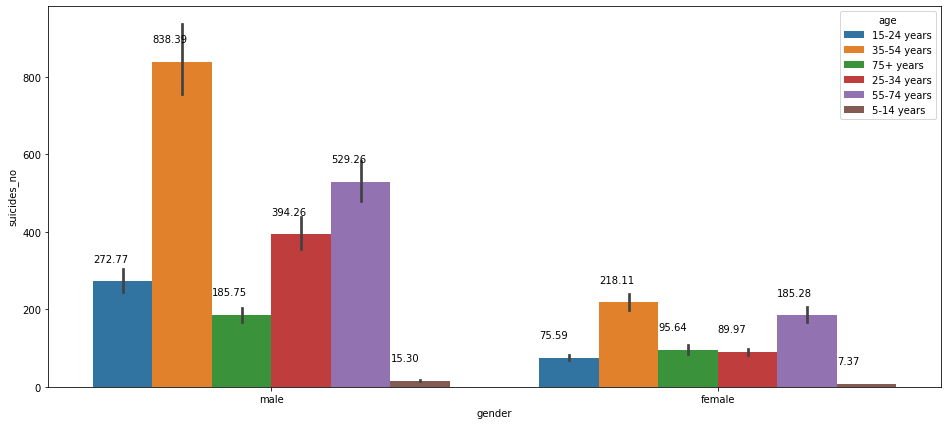

In [18]:
# which age of people suicide most
plt.figure(figsize=(16,7))
age = sns.barplot(x = 'gender', y = 'suicides_no', hue = 'age', data = data)

for p in age.patches:
    age.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
    
# bu grafiğin yorumuna çalışmak gerekiyor.

C:\Users\fozyer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


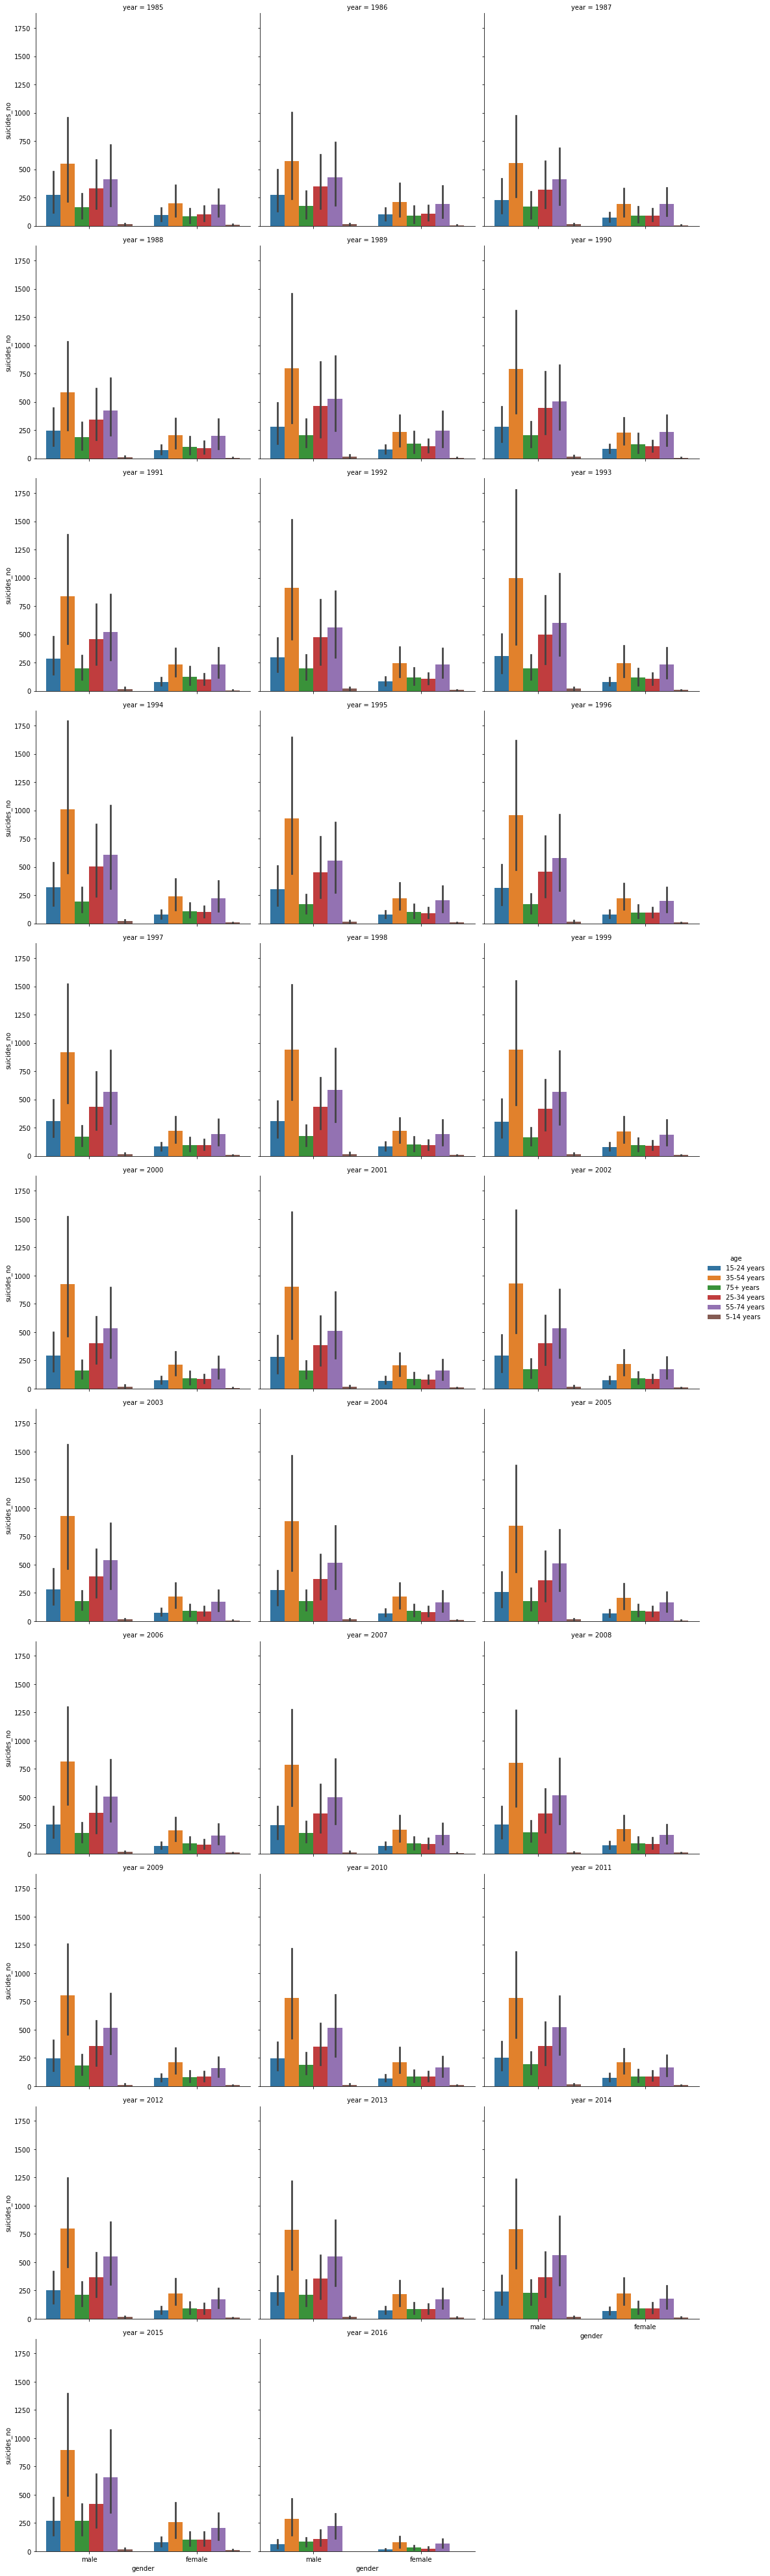

In [19]:
cat_accord_year = sns.catplot('gender','suicides_no',hue='age',col='year', data=data, kind='bar',col_wrap=3)

#kadın ve erkek olarak ayrı olarak gösterebiliriz. Time series için çizgi grafik daha anlamlı.

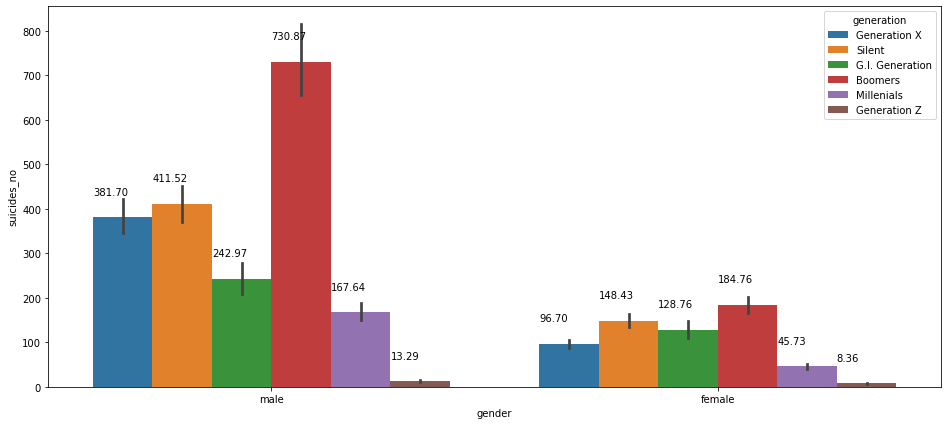

In [20]:
# which generation of people suicide most
plt.figure(figsize=(16,7))
generation = sns.barplot(x = 'gender', y = 'suicides_no', hue = 'generation', data = data)

for p in generation.patches:
    generation.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
    
#eskiden yen,ye doğru olmalı sıralama

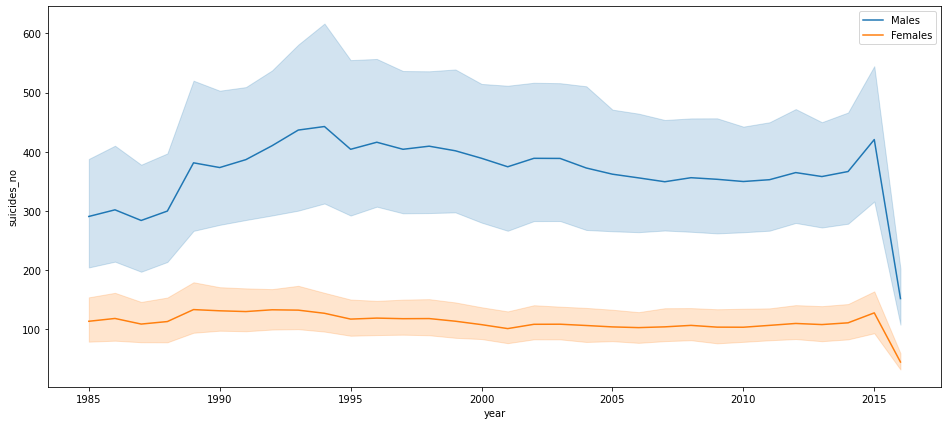

In [21]:

male_population = data.loc[data.loc[:, 'gender']=='male',:]
female_population = data.loc[data.loc[:, 'gender']=='female',:]


plt.figure(figsize=(16,7))


lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

# 3- Keşifsel Veri Analizi

In [22]:
data=pd.read_csv('C:/VeriBilimi/SuicideRates/Data/master.csv')
data=data.rename(columns={'sex':'gender','suicides/100k pop':'suicides_100k_pop','country-year':'country_year','HDI for year':'hdi_for_year',' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})
data.count()

country              27820
year                 27820
gender               27820
age                  27820
suicides_no          27820
population           27820
suicides_100k_pop    27820
country_year         27820
hdi_for_year          8364
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

In [23]:
# Remove "country_year"
data.drop("country_year", axis=1, inplace=True)

# Fill missing values with mean values -> HDI is continious
data.fillna(data.mean(), inplace=True)

data.head()

,country,year,gender,age,suicides_no,population,suicides_100k_pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


In [24]:
data.count()

country              27820
year                 27820
gender               27820
age                  27820
suicides_no          27820
population           27820
suicides_100k_pop    27820
hdi_for_year         27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

In [25]:
data.dtypes

country               object
year                   int64
gender                object
age                   object
suicides_no            int64
population             int64
suicides_100k_pop    float64
hdi_for_year         float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [26]:
(data.dtypes=="object").index[data.dtypes=="object"]

Index(['country', 'gender', 'age', 'gdp_for_year', 'generation'], dtype='object')

In [27]:
Object tipindeki verileri kategorik verilere dönüştürelim:

SyntaxError: invalid syntax (<ipython-input-27-07c5524bac2a>, line 1)

In [28]:
data[["country","age","gender","generation"]] = data[["country","age","gender","generation"]].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            27820 non-null  category
 1   year               27820 non-null  int64   
 2   gender             27820 non-null  category
 3   age                27820 non-null  category
 4   suicides_no        27820 non-null  int64   
 5   population         27820 non-null  int64   
 6   suicides_100k_pop  27820 non-null  float64 
 7   hdi_for_year       27820 non-null  float64 
 8   gdp_for_year       27820 non-null  object  
 9   gdp_per_capita     27820 non-null  int64   
 10  generation         27820 non-null  category
dtypes: category(4), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [29]:
data['gdp_for_year'] = data['gdp_for_year'].astype(str).str.replace(",", "").astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            27820 non-null  category
 1   year               27820 non-null  int64   
 2   gender             27820 non-null  category
 3   age                27820 non-null  category
 4   suicides_no        27820 non-null  int64   
 5   population         27820 non-null  int64   
 6   suicides_100k_pop  27820 non-null  float64 
 7   hdi_for_year       27820 non-null  float64 
 8   gdp_for_year       27820 non-null  int64   
 9   gdp_per_capita     27820 non-null  int64   
 10  generation         27820 non-null  category
dtypes: category(4), float64(2), int64(5)
memory usage: 1.6 MB


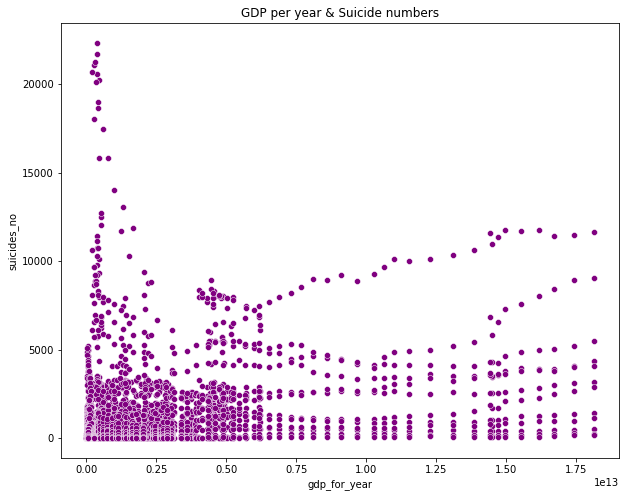

In [30]:
# Yıl bazında gdp_for_year ile intihar sayısı arasındaki ilişkisi
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_for_year", y="suicides_no", data=data, color='purple')
plt.title('GDP per year & Suicide numbers')
plt.show()

#ülke bazında da bakılabilir.

Text(0.5, 1.0, 'GDP per capita & Suicide numbers')

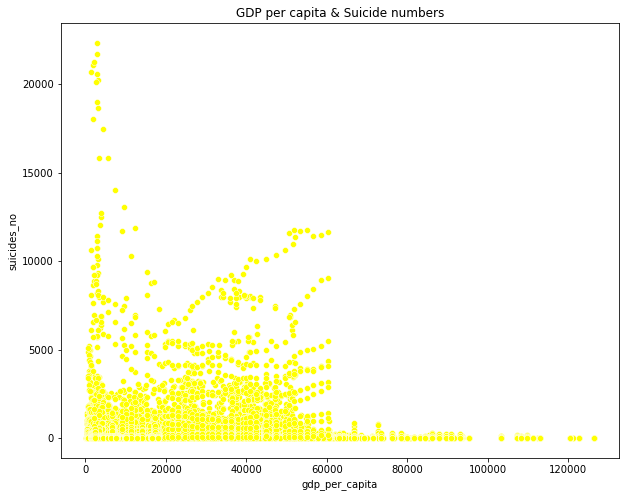

In [31]:
# Kişi başına düşen gdp ile intihar sayısı arasındaki ilişki
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_per_capita", y="suicides_no", data=data, color='yellow')
plt.title('GDP per capita & Suicide numbers')
#plt.show()

Text(0.5, 1.0, 'HDI & Suicide numbers')

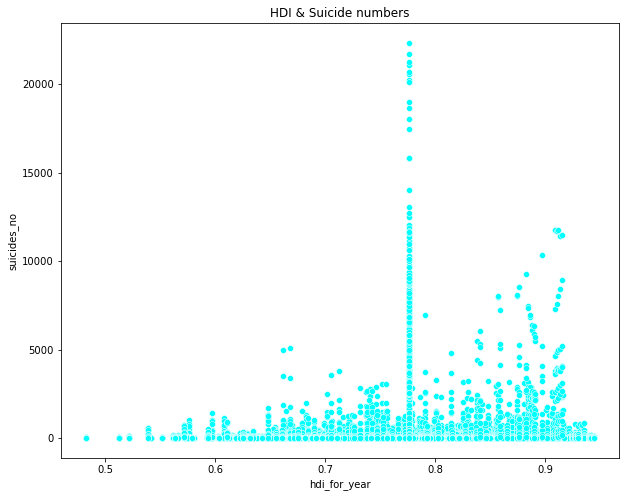

In [32]:
# Hdi ve intihar sayısı arasındaki ilişki
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="hdi_for_year", y="suicides_no", data=data, color='cyan')
plt.title('HDI & Suicide numbers')

# 

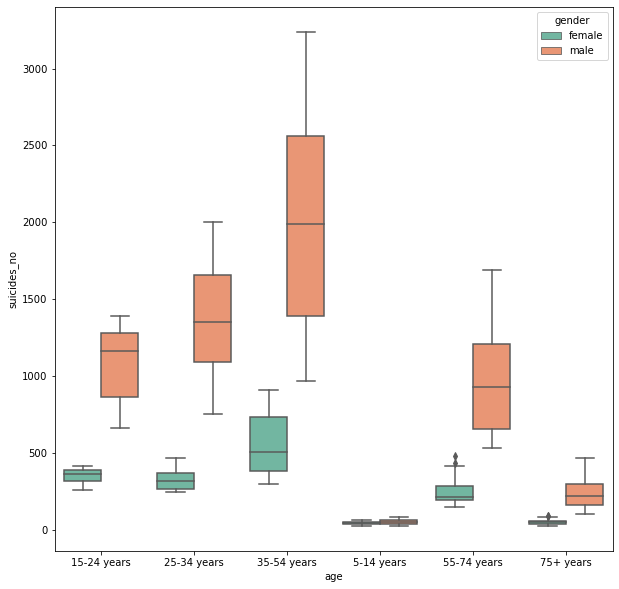

In [34]:
# Brezilya'da yaşa ve cinsiyete göre intiharlar
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.boxplot(x='age', y='suicides_no', hue='gender',
                 data=data[data['country']=='Brazil'],
                 palette='Set2')

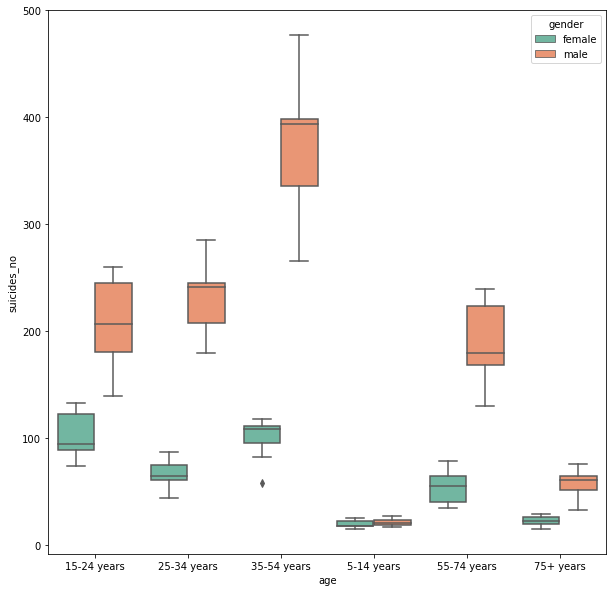

In [35]:
# Türkiye'de yaşa ve cinsiyete göre intiharlar
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.boxplot(x='age', y='suicides_no', hue='gender',data=data[data['country']=='Turkey'],palette='Set2')